In [210]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mcolors


# from analysis_plot_kit.core import fig_generator
from psPlotKit.data_plotter.fig_generator import figureGenerator

In [211]:
data_MVC_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_sea_2D.csv')
data_MVC_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_nacl_2D.csv')
data_MVC_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_simple_2D.csv')
data_MVC_reaktoro = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_reaktoro_2D.csv')

In [212]:
# find errors and create dataframe
results_col = ["LCOW","SEC", "Evaporator area" , "Compressor pressure ratio"] 
error_sea_MVC = pd.DataFrame()
error_nacl_MVC = pd.DataFrame()
error_simple_MVC = pd.DataFrame()

for i in results_col:
    error_sea_MVC[i] = pd.DataFrame(abs(data_MVC_reaktoro[i] - data_MVC_seawater[i]) / data_MVC_reaktoro[i]) * 100
    error_nacl_MVC[i] = pd.DataFrame(abs(data_MVC_reaktoro[i] - data_MVC_nacl[i]) / data_MVC_reaktoro[i]) * 100
    error_simple_MVC[i] = pd.DataFrame(abs(data_MVC_reaktoro[i] - data_MVC_simple[i]) / data_MVC_reaktoro[i]) * 100

In [213]:
# Sea errors
for i in results_col:
    print(i)
    print(np.mean(error_sea_MVC[i]))

# NaCl errors
for i in results_col:
    print(i)
    print(np.mean(error_nacl_MVC[i]))

LCOW
6.491686414961277
SEC
10.129968533149807
Evaporator area
6.463081817343488
Compressor pressure ratio
6.193830260546111
LCOW
5.1080423529808705
SEC
10.47566355689112
Evaporator area
4.234216648980692
Compressor pressure ratio
6.381522958987689


In [214]:
xticks = ([70, 100, 125, 150])
yticks = ([40,50,60,70,80])

In [215]:
# figure.set_default_figure_settings(font_size=12, label_size=12)

(20,)
[ 70. 100. 125. 150.] [40. 50. 60. 70. 80.]
[0] [0] 1.570772 70.0 40.0
[0] [1] 1.556496 70.0 50.0
[0] [2] 1.562428 70.0 60.0
[0] [3] 1.593422 70.0 70.0
[0] [4] 1.699357 70.0 80.0
[1] [0] 1.598531 100.0 40.0
[1] [1] 1.591474 100.0 50.0
[1] [2] 1.613311 100.0 60.0
[1] [3] 1.684087 100.0 70.0
[1] [4] 1.968064 100.0 80.0
[2] [0] 1.627764 125.0 40.0
[2] [1] 1.628294 125.0 50.0
[2] [2] 1.669619 125.0 60.0
[2] [3] 1.798071 125.0 70.0
[2] [4] nan 125.0 80.0
[3] [0] 1.663804 150.0 40.0
[3] [1] 1.674537 150.0 50.0
[3] [2] 1.744498 150.0 60.0
[3] [3] 1.973269 150.0 70.0
[3] [4] nan 150.0 80.0
[[1.570772 1.598531 1.627764 1.663804]
 [1.556496 1.591474 1.628294 1.674537]
 [1.562428 1.613311 1.669619 1.744498]
 [1.593422 1.684087 1.798071 1.973269]
 [1.699357 1.968064      nan      nan]]
1.570772 1.7648825000000001
1.598531 1.7648825000000001
1.627764 1.7648825000000001
1.663804 1.7648825000000001
1.556496 1.7648825000000001
1.591474 1.7648825000000001
1.628294 1.7648825000000001
1.674537 1.76

C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_3076\958054063.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


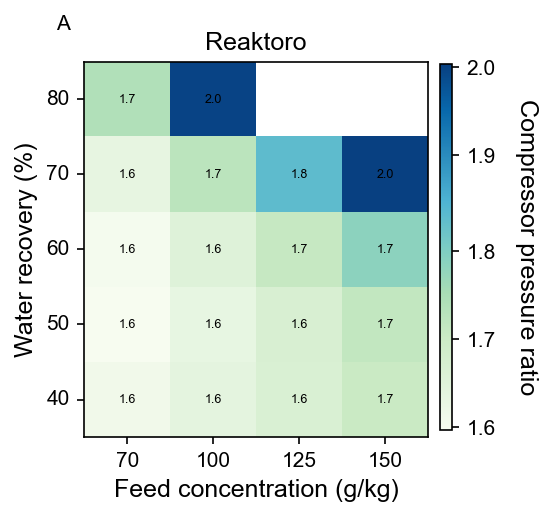

In [216]:
# data_MVC_reaktoro = data_MVC_reaktoro.dropna()

vmin = np.min(data_MVC_reaktoro["Compressor pressure ratio"])
vmax = np.max(data_MVC_reaktoro["Compressor pressure ratio"])

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=2)
figure = figureGenerator()

figure.init_figure()
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 5, "A")
figure.set_title("Reaktoro")
figure.plot_map(
    xdata=data_MVC_reaktoro["# Inlet Salinity"]*1000,
    ydata=data_MVC_reaktoro["Water Recovery"]*100,
    zdata=data_MVC_reaktoro["Compressor pressure ratio"],
    text=True,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=1, zlabel="Compressor pressure ratio", zlabelpad=20)
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=0,
    yformat=0,
    xlabel="Feed concentration (g/kg)",
    ylabel="Water recovery (%)",
)

figure.save_fig(name="plot_reaktoro_op_p_MVC")

C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_3076\3408840046.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(20,)
[ 70. 100. 125. 150.] [40. 50. 60. 70. 80.]
[0] [0] 4.508306 70.0 40.0
[0] [1] 4.380526 70.0 50.0
[0] [2] 4.347964 70.0 60.0
[0] [3] 4.402411 70.0 70.0
[0] [4] 4.650269 70.0 80.0
[1] [0] 4.564807 100.0 40.0
[1] [1] 4.465735 100.0 50.0
[1] [2] 4.479009 100.0 60.0
[1] [3] 4.629825 100.0 70.0
[1] [4] 5.224363 100.0 80.0
[2] [0] 4.62693 125.0 40.0
[2] [1] 4.554725 125.0 50.0
[2] [2] 4.617935 125.0 60.0
[2] [3] 4.891365 125.0 70.0
[2] [4] nan 125.0 80.0
[3] [0] 4.702901 150.0 40.0
[3] [1] 4.663185 150.0 50.0
[3] [2] 4.793005 150.0 60.0
[3] [3] 5.252833 150.0 70.0
[3] [4] nan 150.0 80.0
[[4.508306 4.564807 4.62693  4.702901]
 [4.380526 4.465735 4.554725 4.663185]
 [4.347964 4.479009 4.617935 4.793005]
 [4.402411 4.629825 4.891365 5.252833]
 [4.650269 5.224363      nan      nan]]
4.508306 4.8003985
4.564807 4.8003985
4.62693 4.8003985
4.702901 4.8003985
4.380526 4.8003985
4.465735 4.8003985
4.554725 4.8003985
4.663185 4.8003985
4.347964 4.8003985
4.479009 4.8003985
4.617935 4.8003985
4.

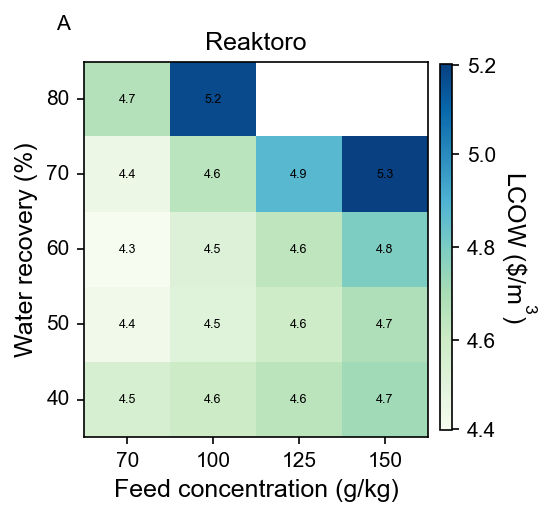

In [217]:

vmin = np.min(data_MVC_reaktoro["LCOW"])
vmax = np.max(data_MVC_reaktoro["LCOW"])

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=2)
figure = figureGenerator()
figure.init_figure()
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 5, "A")
figure.set_title("Reaktoro")
figure.plot_map(
    xdata=data_MVC_reaktoro["# Inlet Salinity"] *1000,
    ydata=data_MVC_reaktoro["Water Recovery"]*100,
    zdata=data_MVC_reaktoro["LCOW"],
    text=True,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=1, zlabel="LCOW ($\$$/m$^3$)", zlabelpad=20)
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Feed concentration (g/kg)",
    ylabel="Water recovery (%)",
)

figure.save_fig(name="plot_reaktoro_lcow_MVC")

C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_3076\402808355.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(20,)
[ 70. 100. 125. 150.] [40. 50. 60. 70. 80.]
[0] [0] 21.16686 70.0 40.0
[0] [1] 20.72434 70.0 50.0
[0] [2] 20.87852 70.0 60.0
[0] [3] 21.75705 70.0 70.0
[0] [4] 24.64913 70.0 80.0
[1] [0] 21.95508 100.0 40.0
[1] [1] 21.73015 100.0 50.0
[1] [2] 22.3315 100.0 60.0
[1] [3] 24.25637 100.0 70.0
[1] [4] 31.10278 100.0 80.0
[2] [0] 22.77042 125.0 40.0
[2] [1] 22.76379 125.0 50.0
[2] [2] 23.88083 125.0 60.0
[2] [3] 27.18089 125.0 70.0
[2] [4] nan 125.0 80.0
[3] [0] 23.754 150.0 40.0
[3] [1] 24.02585 150.0 50.0
[3] [2] 25.85018 150.0 60.0
[3] [3] 31.25077 150.0 70.0
[3] [4] nan 150.0 80.0
[[21.16686 21.95508 22.77042 23.754  ]
 [20.72434 21.73015 22.76379 24.02585]
 [20.87852 22.3315  23.88083 25.85018]
 [21.75705 24.25637 27.18089 31.25077]
 [24.64913 31.10278      nan      nan]]
21.16686 25.987555
21.95508 25.987555
22.77042 25.987555
23.754 25.987555
20.72434 25.987555
21.73015 25.987555
22.76379 25.987555
24.02585 25.987555
20.87852 25.987555
22.3315 25.987555
23.88083 25.987555
25.850

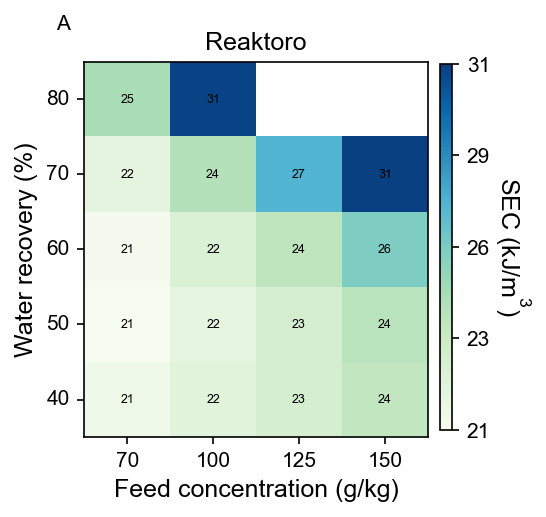

In [218]:
vmin = np.min(data_MVC_reaktoro["SEC"])
vmax = np.max(data_MVC_reaktoro["SEC"])

zticks = np.linspace(vmin,31.25, 5)
zticks = np.around(zticks, decimals=2)
figure = figureGenerator()
figure.init_figure()
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 5, "A")
figure.set_title("Reaktoro")
figure.plot_map(
    xdata=data_MVC_reaktoro["# Inlet Salinity"] *1000,
    ydata=data_MVC_reaktoro["Water Recovery"]*100,
    zdata=data_MVC_reaktoro["SEC"],
    text=True,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="SEC (kJ/m$^{3}$)", zlabelpad=20)
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Feed concentration (g/kg)",
    ylabel="Water recovery (%)",
)

figure.save_fig(name="plot_reaktoro_sec_MVC")

C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_3076\635433638.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(20,)
[ 70. 100. 125. 150.] [40. 50. 60. 70. 80.]
[0] [0] 583.0586 70.0 40.0
[0] [1] 761.1286 70.0 50.0
[0] [2] 934.2989 70.0 60.0
[0] [3] 1100.329 70.0 70.0
[0] [4] 1240.214 70.0 80.0
[1] [0] 601.3061 100.0 40.0
[1] [1] 785.4126 100.0 50.0
[1] [2] 961.1311 100.0 60.0
[1] [3] 1119.197 100.0 70.0
[1] [4] 1190.351 100.0 80.0
[2] [0] 614.5579 125.0 40.0
[2] [1] 803.4601 125.0 50.0
[2] [2] 978.7218 125.0 60.0
[2] [3] 1118.925 125.0 70.0
[2] [4] nan 125.0 80.0
[3] [0] 625.3574 150.0 40.0
[3] [1] 818.0488 150.0 50.0
[3] [2] 989.0247 150.0 60.0
[3] [3] 1094.951 150.0 70.0
[3] [4] nan 150.0 80.0
[[ 583.0586  601.3061  614.5579  625.3574]
 [ 761.1286  785.4126  803.4601  818.0488]
 [ 934.2989  961.1311  978.7218  989.0247]
 [1100.329  1119.197  1118.925  1094.951 ]
 [1240.214  1190.351        nan       nan]]
583.0586 911.6362999999999
601.3061 911.6362999999999
614.5579 911.6362999999999
625.3574 911.6362999999999
761.1286 911.6362999999999
785.4126 911.6362999999999
803.4601 911.6362999999999


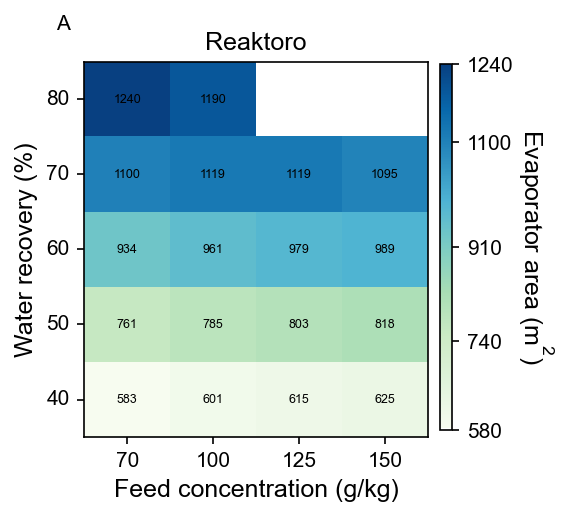

In [219]:

vmin = abs(np.min(data_MVC_reaktoro["Evaporator area"]))
vmax = abs(np.max(data_MVC_reaktoro["Evaporator area"]))

zticks = ([580, 740, 910, 1100, 1240])#np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=0)
figure = figureGenerator()
figure.init_figure()
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 5, "A")
figure.set_title("Reaktoro")
figure.plot_map(
    xdata=data_MVC_reaktoro["# Inlet Salinity"] *1000,
    ydata=data_MVC_reaktoro["Water Recovery"]*100,
    zdata=data_MVC_reaktoro["Evaporator area"],
    text=True,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Evaporator area (m$^{2}$)", zlabelpad=20)
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Feed concentration (g/kg)",
    ylabel="Water recovery (%)",
)

figure.save_fig(name="plot_reaktoro_mem_area_MVC")

In [220]:
error_map = mcolors.LinearSegmentedColormap.from_list('Random gradient 8360', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%208360=006837-238443-41AB5D-78C679-ADDD8E-D9F0A3-FFEDA0-FED976
    (0.000, (0.000, 0.408, 0.216)),
    (0.143, (0.137, 0.518, 0.263)),
    (0.286, (0.255, 0.671, 0.365)),
    (0.429, (0.471, 0.776, 0.475)),
    (0.571, (0.678, 0.867, 0.557)),
    (0.714, (0.851, 0.941, 0.639)),
    (0.857, (1.000, 0.929, 0.627)),
    (1.000, (0.996, 0.851, 0.463))))

In [221]:
def colormap_prop_error(data, error_data, xticks, yticks, z_format=0, i = "LCOW", title = "prop_name", letter = "A", file_name="file"):
    # vmin = np.min([np.min(error_sea[i]), np.min(error_nacl[i]), np.min(error_simple[i])])
    vmin = 0
    vmax = 20
    # vmin = np.min([np.min(error_sea[i]), np.min(error_nacl[i])])
    # vmax = np.max([np.max(error_sea[i]), np.max(error_nacl[i])])

    zticks = np.linspace(vmin, vmax, 5)
    zticks = np.around(zticks, decimals=z_format)
    figure = figureGenerator()
    figure.init_figure()
    figure.colorMaps["color_map"] = matplotlib.colormaps.get_cmap(error_map)
    figure.add_text(-0.75, 5, letter)
    figure.set_title(title)
    figure.plot_map(
        xdata=data["# Inlet Salinity"] *1000,
        ydata=data["Water Recovery"] *100,
        zdata=error_data[i],
        text=True,
        text_color="black",
        build_map=True,
        vmin=vmin,
        vmax=vmax,
        fix_nans=True,
    )
    figure.add_colorbar(zticks=zticks, zformat=0, zlabel= "% Difference", zlabelpad=20)
    figure.set_axis_ticklabels(
        xticklabels=xticks,
        yticklabels=yticks,
        xformat=1,
        yformat=0,
        xlabel="Feed concentration (g/kg)",
        ylabel="Water recovery (%)",
    )
    # figure.add_text(-15,21,title)
    figure.save_fig(name=file_name)

(20,)
[ 70. 100. 125. 150.] [40. 50. 60. 70. 80.]
[0] [0] 0.5055475906114939 70.0 40.0
[0] [1] 0.018053371161890278 70.0 50.0
[0] [2] 0.607900012032555 70.0 60.0
[0] [3] 2.2784296940797875 70.0 70.0
[0] [4] 8.907545618725196 70.0 80.0
[1] [0] 0.02214533218310846 100.0 40.0
[1] [1] 1.4167369369527791 100.0 50.0
[1] [2] 3.231243077125242 100.0 60.0
[1] [3] 8.317919442404111 100.0 70.0
[1] [4] 25.398208594842437 100.0 80.0
[2] [0] 0.7723478342069261 125.0 40.0
[2] [1] 4.261024114809737 125.0 50.0
[2] [2] 9.037990104329193 125.0 60.0
[2] [3] 18.0353834748461 125.0 70.0
[2] [4] nan 125.0 80.0
[3] [0] 2.3977583898103307 150.0 40.0
[3] [1] 6.99423183841265 150.0 50.0
[3] [2] 13.092649002750353 150.0 60.0
[3] [3] nan 150.0 70.0
[3] [4] nan 150.0 80.0
[[5.05547591e-01 2.21453322e-02 7.72347834e-01 2.39775839e+00]
 [1.80533712e-02 1.41673694e+00 4.26102411e+00 6.99423184e+00]
 [6.07900012e-01 3.23124308e+00 9.03799010e+00 1.30926490e+01]
 [2.27842969e+00 8.31791944e+00 1.80353835e+01            

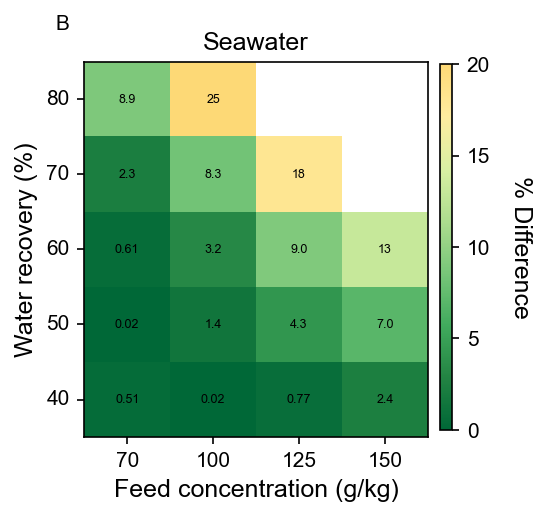

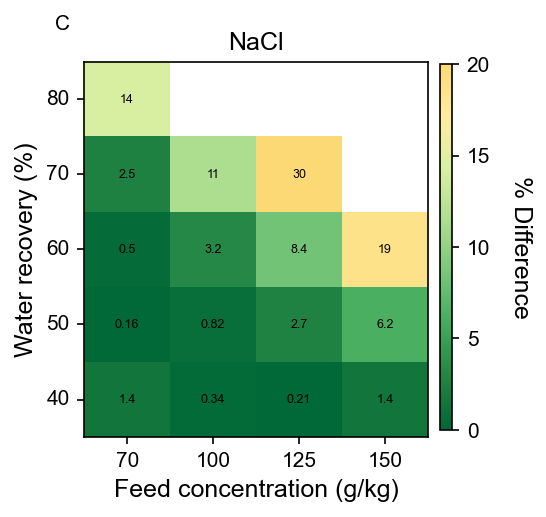

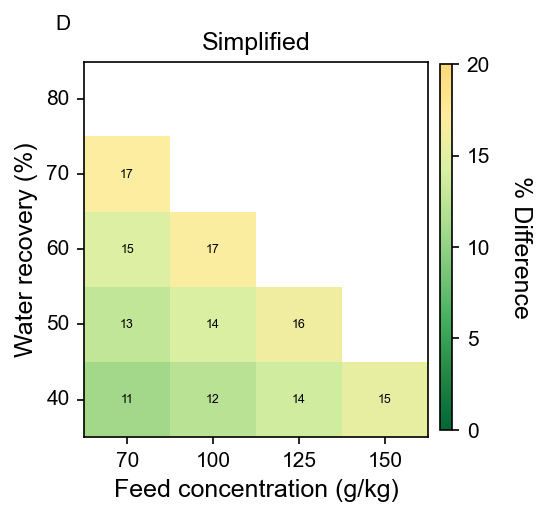

In [222]:

colormap_prop_error(data_MVC_seawater, error_sea_MVC, xticks, yticks, 1, "Compressor pressure ratio", "Seawater", "B", "plot_sea_com_P")
colormap_prop_error(data_MVC_nacl, error_nacl_MVC, xticks, yticks, 1, "Compressor pressure ratio", "NaCl", "C","plot_nacl_com_P")
colormap_prop_error(data_MVC_simple, error_simple_MVC, xticks, yticks, 1, "Compressor pressure ratio", "Simplified", "D", "plot_simple_com_P")

(20,)
[ 70. 100. 125. 150.] [40. 50. 60. 70. 80.]
[0] [0] 0.4153222962238974 70.0 40.0
[0] [1] 0.08492130853690862 70.0 50.0
[0] [2] 0.575487745528709 70.0 60.0
[0] [3] 2.2416580369256747 70.0 70.0
[0] [4] 7.743423014883666 70.0 80.0
[1] [0] 0.34801033209071197 100.0 40.0
[1] [1] 1.3235223317102478 100.0 50.0
[1] [2] 3.1325009617082835 100.0 60.0
[1] [3] 7.51929068593304 100.0 70.0
[1] [4] 25.892515508589263 100.0 80.0
[2] [0] 1.7044346899564102 125.0 40.0
[2] [1] 3.8589376965678506 125.0 50.0
[2] [2] 7.7367481352595915 125.0 60.0
[2] [3] 19.23557125669418 125.0 70.0
[2] [4] nan 125.0 80.0
[3] [0] 3.843840216921431 150.0 40.0
[3] [1] 8.746983016972301 150.0 50.0
[3] [2] 15.955501819839538 150.0 60.0
[3] [3] nan 150.0 70.0
[3] [4] nan 150.0 80.0
[[ 0.4153223   0.34801033  1.70443469  3.84384022]
 [ 0.08492131  1.32352233  3.8589377   8.74698302]
 [ 0.57548775  3.13250096  7.73674814 15.95550182]
 [ 2.24165804  7.51929069 19.23557126         nan]
 [ 7.74342301 25.89251551         nan    

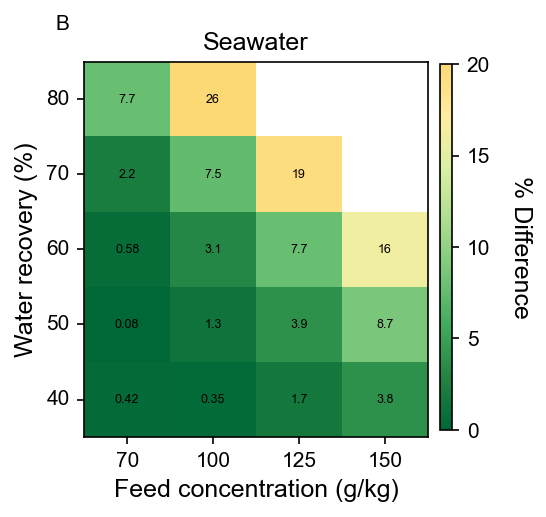

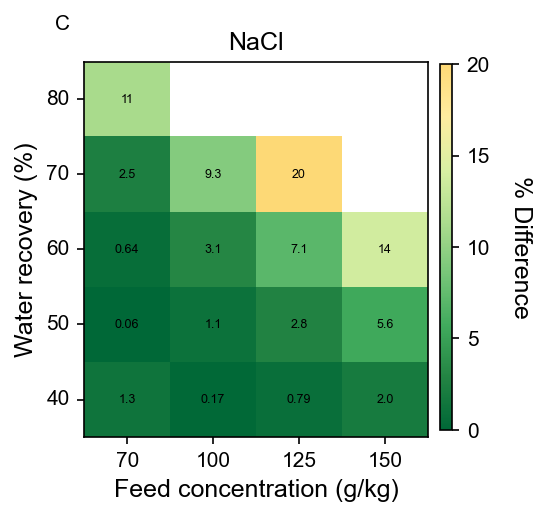

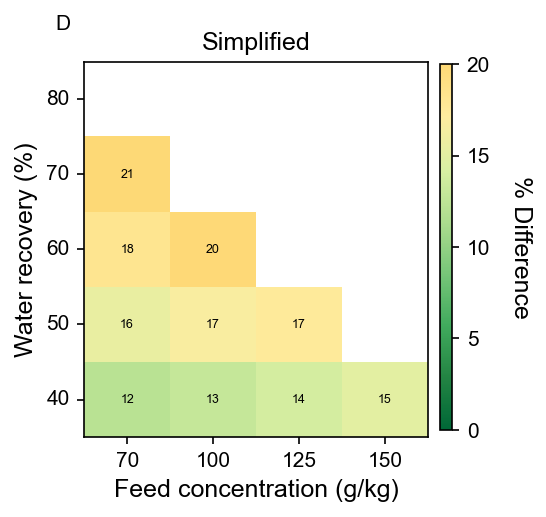

In [223]:
colormap_prop_error(data_MVC_seawater, error_sea_MVC, xticks, yticks, 1, "LCOW", "Seawater","B","plot_sea_LCOW_MVC")
colormap_prop_error(data_MVC_nacl, error_nacl_MVC, xticks, yticks, 1, "LCOW", "NaCl", "C", "plot_nacl_LCOW_MVC")
colormap_prop_error(data_MVC_simple, error_simple_MVC, xticks, yticks, 1, "LCOW", "Simplified", "D","plot_simple_LCOW_MVC")

(20,)
[ 70. 100. 125. 150.] [40. 50. 60. 70. 80.]
[0] [0] 0.9276765661037988 70.0 40.0
[0] [1] 0.03961525433378469 70.0 50.0
[0] [2] 1.3348647317913198 70.0 60.0
[0] [3] 4.737866576580934 70.0 70.0
[0] [4] 15.550974821423713 70.0 80.0
[1] [0] 0.3123650653971689 100.0 40.0
[1] [1] 2.9706651817866003 100.0 50.0
[1] [2] 6.519042607975282 100.0 60.0
[1] [3] 14.915422216926938 100.0 70.0
[1] [4] 33.50189275685324 100.0 80.0
[2] [0] 1.969924138421676 125.0 40.0
[2] [1] 8.367104071861494 125.0 50.0
[2] [2] 16.411238637853035 125.0 60.0
[2] [3] 28.863514035044457 125.0 70.0
[2] [4] nan 125.0 80.0
[3] [0] 2.33809042687547 150.0 40.0
[3] [1] 13.572131683166266 150.0 50.0
[3] [2] 19.877076291151546 150.0 60.0
[3] [3] nan 150.0 70.0
[3] [4] nan 150.0 80.0
[[ 0.92767657  0.31236507  1.96992414  2.33809043]
 [ 0.03961525  2.97066518  8.36710407 13.57213168]
 [ 1.33486473  6.51904261 16.41123864 19.87707629]
 [ 4.73786658 14.91542222 28.86351404         nan]
 [15.55097482 33.50189276         nan     

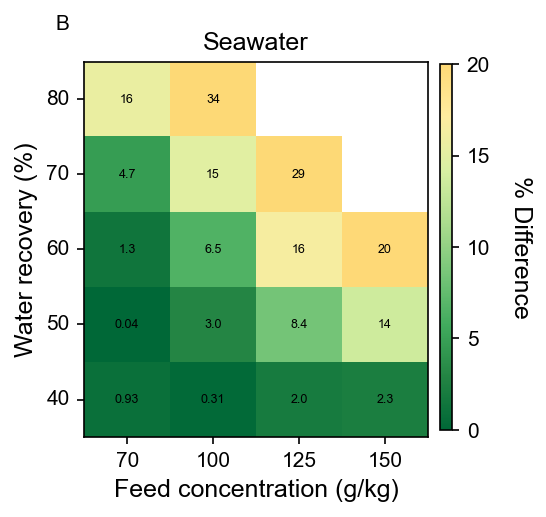

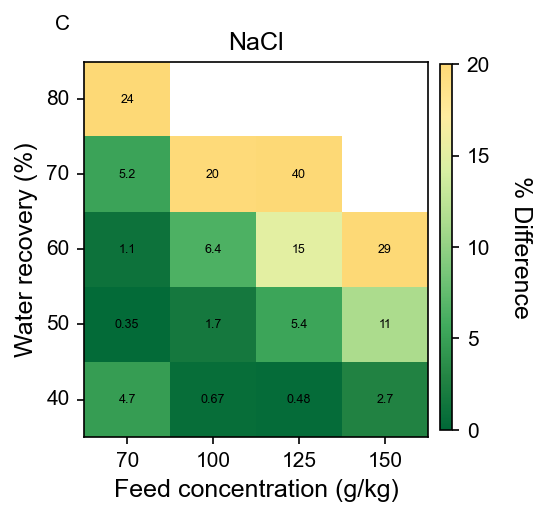

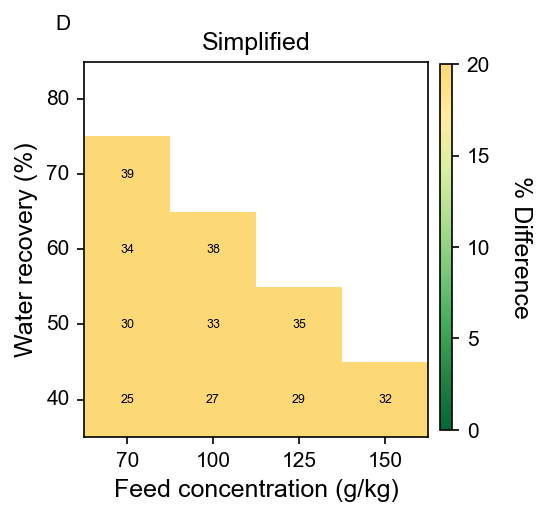

In [224]:
colormap_prop_error(data_MVC_seawater, error_sea_MVC, xticks, yticks, 0, "SEC", "Seawater","B","plot_sea_SEC_MVC")
colormap_prop_error(data_MVC_nacl, error_nacl_MVC, xticks, yticks, 0, "SEC", "NaCl", "C","plot_nacl_SEC_MVC")
colormap_prop_error(data_MVC_simple, error_simple_MVC, xticks, yticks, 0, "SEC", "Simplified", "D", "plot_simple_SEC_MVC")

(20,)
[ 70. 100. 125. 150.] [40. 50. 60. 70. 80.]
[0] [0] 2.7054055973104747 70.0 40.0
[0] [1] 0.29800483124664856 70.0 50.0
[0] [2] 0.3380930877688117 70.0 60.0
[0] [3] 0.8971862052167892 70.0 70.0
[0] [4] 4.523009738641882 70.0 80.0
[1] [0] 4.1078412475775625 100.0 40.0
[1] [1] 1.0547322515579698 100.0 50.0
[1] [2] 2.004034621291516 100.0 60.0
[1] [3] 5.507520123803037 100.0 70.0
[1] [4] 12.87737818508993 100.0 80.0
[2] [0] 8.122245275831611 125.0 40.0
[2] [1] 4.551688378800643 125.0 50.0
[2] [2] 9.668702587395117 125.0 60.0
[2] [3] 2.221149764282688 125.0 70.0
[2] [4] nan 125.0 80.0
[3] [0] 28.48307223997029 150.0 40.0
[3] [1] 4.4312515341382985 150.0 50.0
[3] [2] 18.081075224916027 150.0 60.0
[3] [3] nan 150.0 70.0
[3] [4] nan 150.0 80.0
[[ 2.7054056   4.10784125  8.12224528 28.48307224]
 [ 0.29800483  1.05473225  4.55168838  4.43125153]
 [ 0.33809309  2.00403462  9.66870259 18.08107522]
 [ 0.89718621  5.50752012  2.22114976         nan]
 [ 4.52300974 12.87737819         nan       

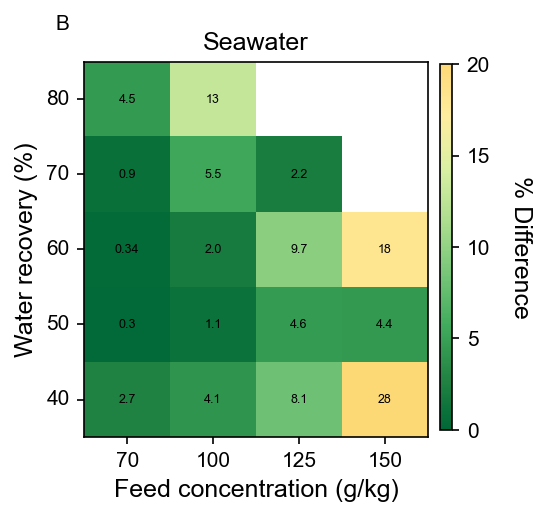

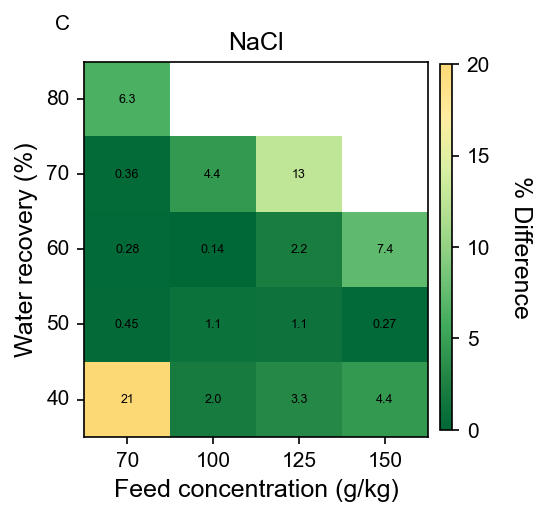

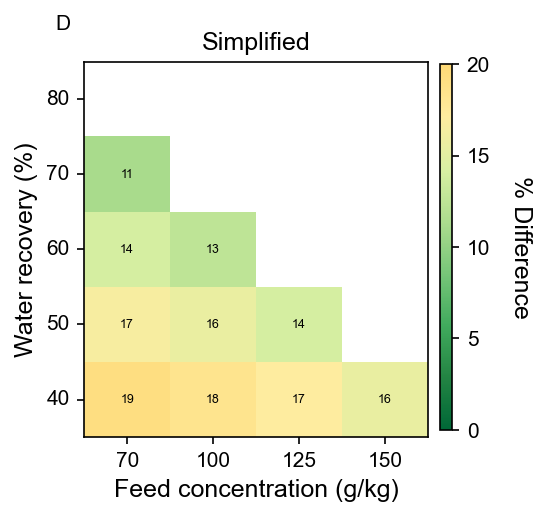

In [225]:
colormap_prop_error(data_MVC_seawater, error_sea_MVC, xticks, yticks, 2, "Evaporator area", "Seawater", "B", "plot_sea_evap_a")
colormap_prop_error(data_MVC_nacl, error_nacl_MVC, xticks, yticks, 2, "Evaporator area", "NaCl", "C","plot_nacl_evap_a")
colormap_prop_error(data_MVC_simple, error_simple_MVC, xticks, yticks, 2, "Evaporator area", "Simplified", "D", "plot_simple_evap_a")

In [226]:
sea_color = "#FFD046"
nacl_color = "#4A7B9D"
simple_color = "#467740"
reaktoro_color = "#C73E1D"

title_size = 14
plt.rcParams.update({'font.size': 14})

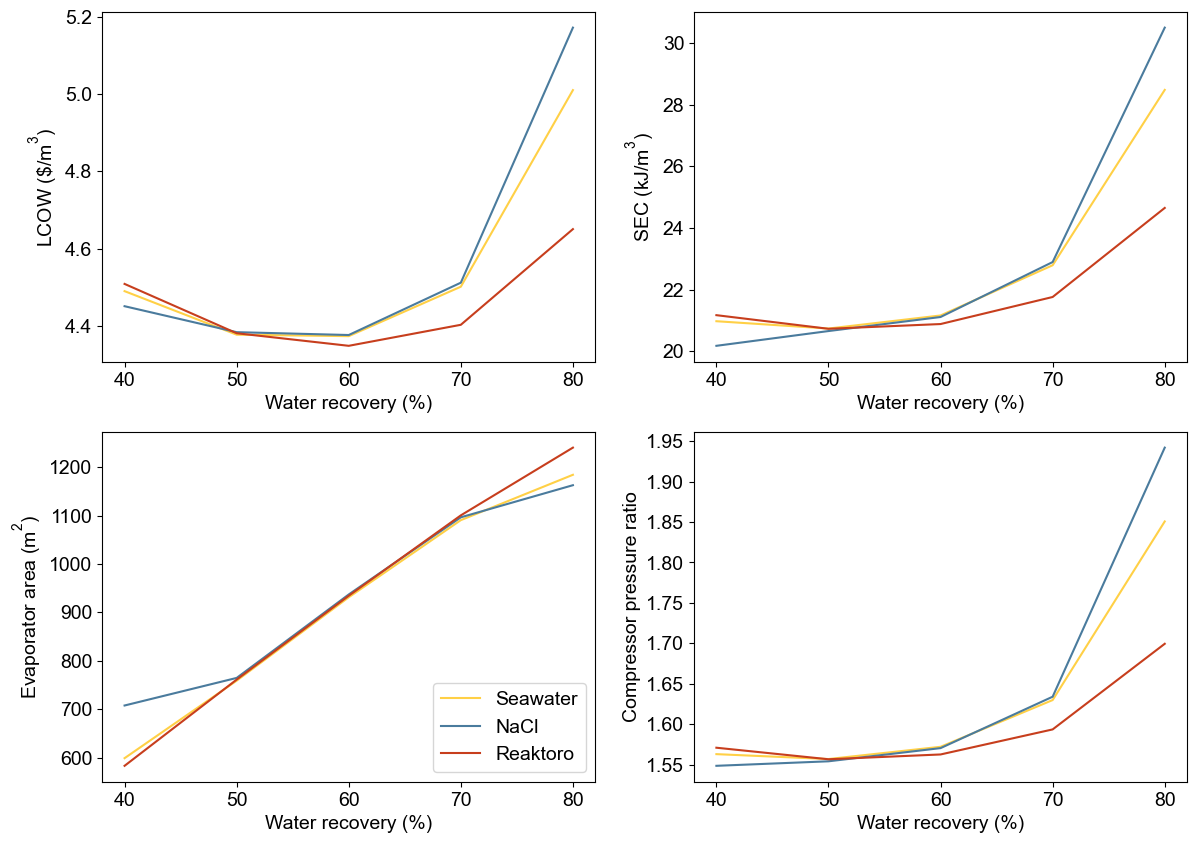

In [227]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5*4, 2.5*4))

data_MVC_reaktoro = data_MVC_reaktoro[data_MVC_reaktoro["# Inlet Salinity"]==0.07]
data_MVC_seawater = data_MVC_seawater[data_MVC_seawater["# Inlet Salinity"]==0.07]
data_MVC_nacl = data_MVC_nacl[data_MVC_nacl["# Inlet Salinity"]==0.07]

axs[0,0].plot(data_MVC_seawater['Water Recovery']*100, data_MVC_seawater['LCOW'], color=sea_color)
axs[0,0].plot(data_MVC_nacl['Water Recovery']*100, data_MVC_nacl['LCOW'], color=nacl_color)
axs[0,0].plot(data_MVC_reaktoro['Water Recovery']*100, data_MVC_reaktoro['LCOW'], color=reaktoro_color)
# axs[0,0].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['LCOW'], color=simple_color)

axs[0,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,0].set_ylabel("LCOW ($\$$/m$^3$)", fontsize=title_size)


axs[0,1].plot(data_MVC_seawater['Water Recovery']*100, data_MVC_seawater['SEC'], color=sea_color)
axs[0,1].plot(data_MVC_nacl['Water Recovery']*100, data_MVC_nacl['SEC'], color=nacl_color)
axs[0,1].plot(data_MVC_reaktoro['Water Recovery']*100, data_MVC_reaktoro['SEC'], color=reaktoro_color)
# axs[0,1].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['SEC'], color=simple_color)

axs[0,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,1].set_ylabel("SEC (kJ/m$^{3}$)", fontsize=title_size)

axs[1,0].plot(data_MVC_seawater['Water Recovery']*100, data_MVC_seawater['Evaporator area'], color=sea_color)
axs[1,0].plot(data_MVC_nacl['Water Recovery']*100, data_MVC_nacl['Evaporator area'], color=nacl_color)
axs[1,0].plot(data_MVC_reaktoro['Water Recovery']*100, data_MVC_reaktoro['Evaporator area'], color=reaktoro_color)
# axs[1,0].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['Evaporator area'], color=simple_color)

axs[1,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,0].set_ylabel("Evaporator area (m$^{2}$)", fontsize=title_size)

axs[1,1].plot(data_MVC_seawater['Water Recovery']*100, data_MVC_seawater['Compressor pressure ratio'], color=sea_color)
axs[1,1].plot(data_MVC_nacl['Water Recovery']*100, data_MVC_nacl['Compressor pressure ratio'], color=nacl_color)
axs[1,1].plot(data_MVC_reaktoro['Water Recovery']*100, data_MVC_reaktoro['Compressor pressure ratio'], color=reaktoro_color)
# axs[1,1].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['Compressor pressure ratio'], color=simple_color)

axs[1,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,1].set_ylabel("Compressor pressure ratio", fontsize=title_size)

axs[1,0].legend(["Seawater","NaCl","Reaktoro"],loc="lower right",fontsize=title_size)

fig.savefig("MVC_comparison")

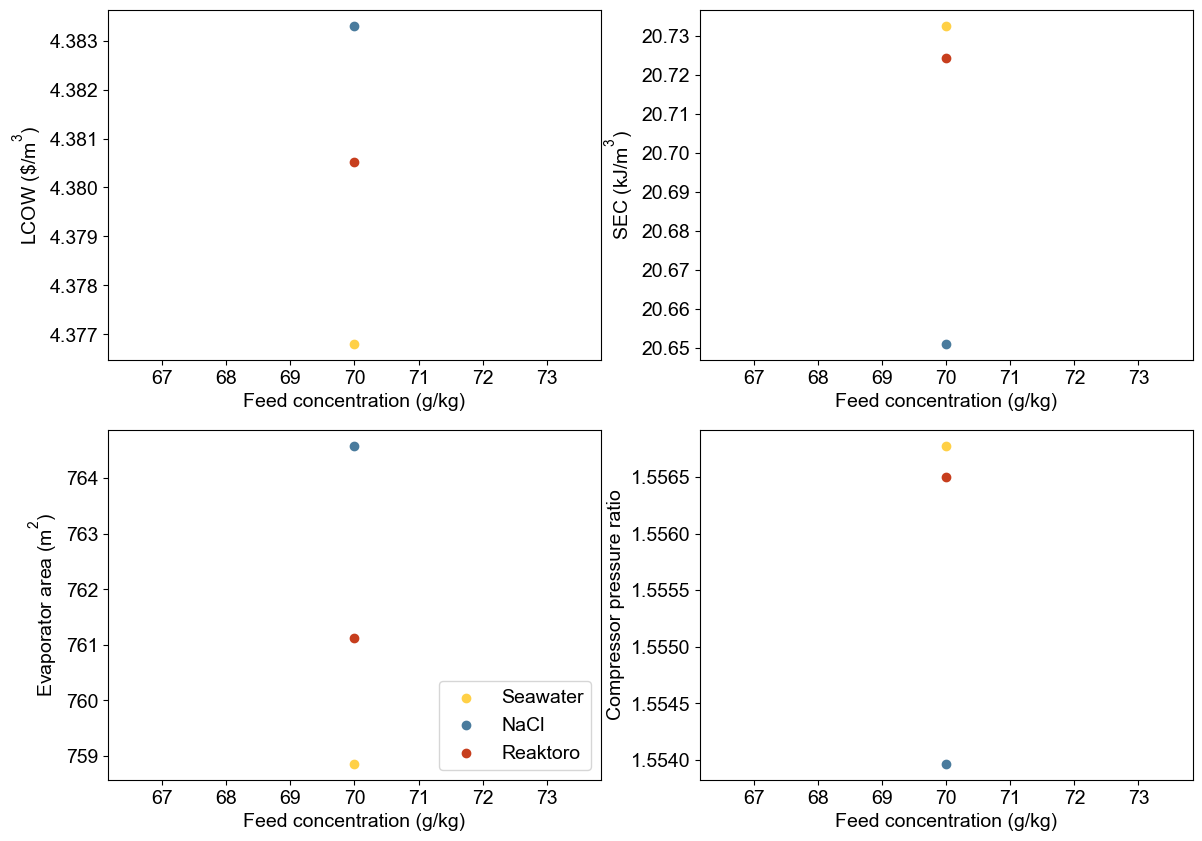

In [228]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5*4, 2.5*4))

data_MVC_reaktoro = data_MVC_reaktoro[data_MVC_reaktoro["Water Recovery"]==0.5]
data_MVC_seawater = data_MVC_seawater[data_MVC_seawater["Water Recovery"]==0.5]
data_MVC_nacl = data_MVC_nacl[data_MVC_nacl["Water Recovery"]==0.5]

axs[0,0].scatter(data_MVC_seawater["# Inlet Salinity"] *1000, data_MVC_seawater['LCOW'], color=sea_color)
axs[0,0].scatter(data_MVC_nacl["# Inlet Salinity"] *1000, data_MVC_nacl['LCOW'], color=nacl_color)
axs[0,0].scatter(data_MVC_reaktoro["# Inlet Salinity"] *1000, data_MVC_reaktoro['LCOW'], color=reaktoro_color)
# axs[0,0].scatter(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['LCOW'], color=simple_color)

axs[0,0].set_xlabel("Feed concentration (g/kg)", fontsize=title_size)
axs[0,0].set_ylabel("LCOW ($\$$/m$^3$)", fontsize=title_size)


axs[0,1].scatter(data_MVC_seawater["# Inlet Salinity"] *1000, data_MVC_seawater['SEC'], color=sea_color)
axs[0,1].scatter(data_MVC_nacl["# Inlet Salinity"] *1000, data_MVC_nacl['SEC'], color=nacl_color)
axs[0,1].scatter(data_MVC_reaktoro["# Inlet Salinity"] *1000, data_MVC_reaktoro['SEC'], color=reaktoro_color)
# axs[0,1].scatter(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['SEC'], color=simple_color)

axs[0,1].set_xlabel("Feed concentration (g/kg)", fontsize=title_size)
axs[0,1].set_ylabel("SEC (kJ/m$^{3}$)", fontsize=title_size)

axs[1,0].scatter(data_MVC_seawater["# Inlet Salinity"] *1000, data_MVC_seawater['Evaporator area'], color=sea_color)
axs[1,0].scatter(data_MVC_nacl["# Inlet Salinity"] *1000, data_MVC_nacl['Evaporator area'], color=nacl_color)
axs[1,0].scatter(data_MVC_reaktoro["# Inlet Salinity"] *1000, data_MVC_reaktoro['Evaporator area'], color=reaktoro_color)
# axs[1,0].scatter(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['Evaporator area'], color=simple_color)

axs[1,0].set_xlabel("Feed concentration (g/kg)", fontsize=title_size)
axs[1,0].set_ylabel("Evaporator area (m$^{2}$)", fontsize=title_size)

axs[1,1].scatter(data_MVC_seawater["# Inlet Salinity"] *1000, data_MVC_seawater['Compressor pressure ratio'], color=sea_color)
axs[1,1].scatter(data_MVC_nacl["# Inlet Salinity"] *1000, data_MVC_nacl['Compressor pressure ratio'], color=nacl_color)
axs[1,1].scatter(data_MVC_reaktoro["# Inlet Salinity"] *1000, data_MVC_reaktoro['Compressor pressure ratio'], color=reaktoro_color)
# axs[1,1].scatter(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['Compressor pressure ratio'], color=simple_color)

axs[1,1].set_xlabel("Feed concentration (g/kg)", fontsize=title_size)
axs[1,1].set_ylabel("Compressor pressure ratio", fontsize=title_size)

axs[1,0].legend(["Seawater","NaCl","Reaktoro"],loc="lower right",fontsize=title_size)

fig.savefig("MVC_comparison")